### CIFAR DATA
The problem of automatically identifying objects in photographs is difficult because of the near infinite number of permutations of objects, positions, lighting and so on. It’s a really hard problem. This is a well studied problem in computer vision and more recently an important demonstration of the capability of deep learning. A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research
(CIFAR).
The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name
CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance. The photos are in color with red, green and blue channels, but are small measuring 32 × 32 pixel squares.

In [35]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [36]:
X_train.shape

(37500, 32, 32, 3)

In [37]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [14]:

X_train /= 255
X_val /= 255
X_test /= 255

from keras.constraints import max_norm

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', kernel_constraint=max_norm(3.) ))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=10,
                   verbose=1,
                   validation_data=(X_val, y_val))


Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 155s 4ms/step - loss: 1.6175 - accuracy: 0.4153 - val_loss: 1.2856 - val_accuracy: 0.5452
Epoch 2/10
37500/37500 [==============================] - 159s 4ms/step - loss: 1.3319 - accuracy: 0.5228 - val_loss: 1.2349 - val_accuracy: 0.5672
Epoch 3/10
37500/37500 [==============================] - 169s 4ms/step - loss: 1.2272 - accuracy: 0.5629 - val_loss: 1.1502 - val_accuracy: 0.5933
Epoch 4/10
37500/37500 [==============================] - 159s 4ms/step - loss: 1.1419 - accuracy: 0.5917 - val_loss: 1.0850 - val_accuracy: 0.6198
Epoch 5/10
37500/37500 [==============================] - 154s 4ms/step - loss: 1.0718 - accuracy: 0.6177 - val_loss: 1.0701 - val_accuracy: 0.6218
Epoch 6/10
37500/37500 [==============================] - 154s 4ms/step - loss: 1.0092 - accuracy: 0.6388 - val_loss: 1.0413 - val_accuracy: 0.6352
Epoch 7/10
37500/37500 [==============================] - 154s

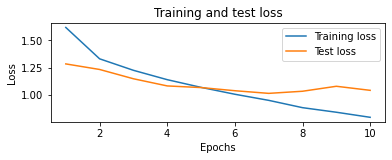

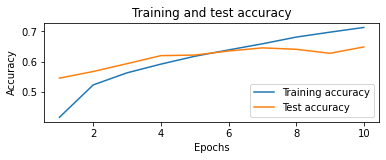

accuracy: 64.53%


In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen.fit(X_train)
val_datagen.fit(X_val)

training_set = train_datagen.flow(X_train, y_train, batch_size=32)
val_set = val_datagen.flow(X_train, y_train, batch_size=32)

X_test = X_test/255

In [9]:
from keras.constraints import max_norm

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', kernel_constraint=max_norm(3.) ))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=True)

Epoch 1/10
1171/1171 [==============================] - 170s 145ms/step - loss: 1.8038 - accuracy: 0.3426 - val_loss: 1.5048 - val_accuracy: 0.4894
Epoch 2/10
1171/1171 [==============================] - 171s 146ms/step - loss: 1.6315 - accuracy: 0.4060 - val_loss: 1.4541 - val_accuracy: 0.5068
Epoch 3/10
1171/1171 [==============================] - 173s 148ms/step - loss: 1.5741 - accuracy: 0.4271 - val_loss: 1.4423 - val_accuracy: 0.5220
Epoch 4/10
1171/1171 [==============================] - 171s 146ms/step - loss: 1.5411 - accuracy: 0.4418 - val_loss: 1.5344 - val_accuracy: 0.5432
Epoch 5/10
1171/1171 [==============================] - 172s 147ms/step - loss: 1.5191 - accuracy: 0.4529 - val_loss: 1.1157 - val_accuracy: 0.5466
Epoch 6/10
1171/1171 [==============================] - 168s 144ms/step - loss: 1.4886 - accuracy: 0.4648 - val_loss: 1.5808 - val_accuracy: 0.5272
Epoch 7/10
1171/1171 [==============================] - 167s 143ms/step - loss: 1.4864 - accuracy: 0.4642 - val_

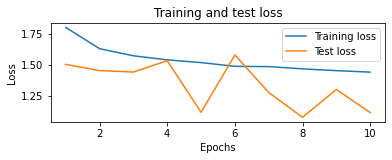

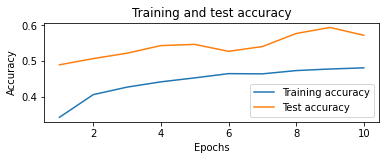

accuracy: 54.79%


In [10]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [19]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu' , padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu' , padding='same' ))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu' , padding='same' ))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu' , padding='same' ))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu' , padding='same' ))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu' , padding='same' ))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=True)

Epoch 1/10
1171/1171 [==============================] - 475s 405ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.2997 - val_accuracy: 0.0991
Epoch 2/10
1171/1171 [==============================] - 474s 404ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3023 - val_accuracy: 0.0995
Epoch 3/10
1171/1171 [==============================] - 474s 404ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3019 - val_accuracy: 0.1044
Epoch 4/10
1171/1171 [==============================] - 467s 399ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3005 - val_accuracy: 0.1024
Epoch 5/10
1171/1171 [==============================] - 480s 410ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3030 - val_accuracy: 0.1016
Epoch 6/10
1171/1171 [==============================] - 338s 288ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3020 - val_accuracy: 0.0997
Epoch 7/10
1171/1171 [==============================] - 339s 289ms/step - loss: 2.3027 - accuracy: 0.1009 - val_

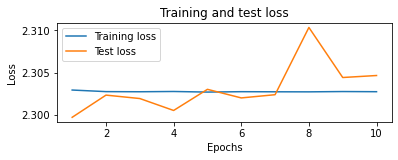

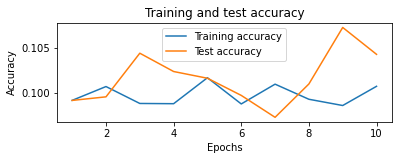

accuracy: 10.00%


In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen.fit(X_train)
val_datagen.fit(X_val)

training_set = train_datagen.flow(X_train, y_train, batch_size=32)
val_set = val_datagen.flow(X_train, y_train, batch_size=32)

X_test = X_test/255

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu' ))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu' ))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu' ))
#model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=False)



Epoch 1/10
1171/1171 [==============================] - 249s 212ms/step - loss: 1.9792 - accuracy: 0.2396 - val_loss: 1.8699 - val_accuracy: 0.3496
Epoch 2/10
1171/1171 [==============================] - 249s 212ms/step - loss: 1.7727 - accuracy: 0.3345 - val_loss: 1.4624 - val_accuracy: 0.4338
Epoch 3/10
1171/1171 [==============================] - 262s 224ms/step - loss: 1.6642 - accuracy: 0.3869 - val_loss: 1.4063 - val_accuracy: 0.4327
Epoch 4/10
1171/1171 [==============================] - 246s 210ms/step - loss: 1.5858 - accuracy: 0.4245 - val_loss: 1.2019 - val_accuracy: 0.5341
Epoch 5/10
1171/1171 [==============================] - 248s 212ms/step - loss: 1.5172 - accuracy: 0.4506 - val_loss: 1.4186 - val_accuracy: 0.5418
Epoch 6/10
1171/1171 [==============================] - 247s 211ms/step - loss: 1.4839 - accuracy: 0.4680 - val_loss: 1.2168 - val_accuracy: 0.5413
Epoch 7/10
1171/1171 [==============================] - 241s 206ms/step - loss: 1.4425 - accuracy: 0.4834 - val_

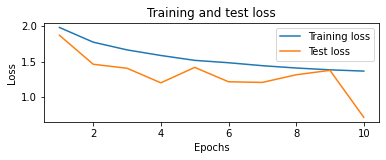

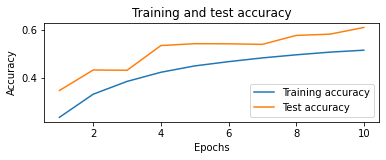

accuracy: 59.09%


In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [26]:
model.save("Cifarmodel.h5")

In [27]:
from keras.models import load_model
model = load_model('Cifarmodel.h5')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_15 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 64)       

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=False)

Epoch 1/10
1171/1171 [==============================] - 258s 221ms/step - loss: 1.3439 - accuracy: 0.5266 - val_loss: 1.3174 - val_accuracy: 0.6127
Epoch 2/10
1171/1171 [==============================] - 255s 218ms/step - loss: 1.3243 - accuracy: 0.5364 - val_loss: 1.1871 - val_accuracy: 0.6242
Epoch 3/10
1171/1171 [==============================] - 255s 217ms/step - loss: 1.3155 - accuracy: 0.5404 - val_loss: 0.9698 - val_accuracy: 0.6324
Epoch 4/10
1171/1171 [==============================] - 253s 216ms/step - loss: 1.3017 - accuracy: 0.5436 - val_loss: 0.9289 - val_accuracy: 0.6487
Epoch 5/10
1171/1171 [==============================] - 254s 217ms/step - loss: 1.2852 - accuracy: 0.5501 - val_loss: 0.9245 - val_accuracy: 0.6568
Epoch 6/10
1171/1171 [==============================] - 255s 218ms/step - loss: 1.2749 - accuracy: 0.5507 - val_loss: 0.8829 - val_accuracy: 0.6080
Epoch 7/10
1171/1171 [==============================] - 254s 217ms/step - loss: 1.2722 - accuracy: 0.5585 - val_

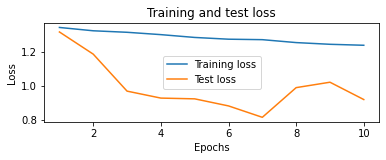

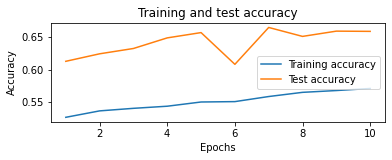

accuracy: 63.80%


In [31]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [29]:
model.save("Cifarmodel1.h5")

In [30]:
model = load_model('Cifarmodel1.h5')

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=100,
                             shuffle=False)

Epoch 1/100
1171/1171 [==============================] - 180s 154ms/step - loss: 1.2327 - accuracy: 0.5734 - val_loss: 0.8196 - val_accuracy: 0.6787
Epoch 2/100
1171/1171 [==============================] - 180s 154ms/step - loss: 1.2252 - accuracy: 0.5775 - val_loss: 1.0917 - val_accuracy: 0.6535
Epoch 3/100
1171/1171 [==============================] - 181s 154ms/step - loss: 1.2241 - accuracy: 0.5750 - val_loss: 0.7375 - val_accuracy: 0.6919
Epoch 4/100
1171/1171 [==============================] - 179s 153ms/step - loss: 1.2089 - accuracy: 0.5817 - val_loss: 1.0267 - val_accuracy: 0.6806
Epoch 5/100
1171/1171 [==============================] - 183s 156ms/step - loss: 1.2135 - accuracy: 0.5801 - val_loss: 1.1914 - val_accuracy: 0.6769
Epoch 6/100
1171/1171 [==============================] - 186s 159ms/step - loss: 1.2031 - accuracy: 0.5847 - val_loss: 0.9250 - val_accuracy: 0.6753
Epoch 7/100
1171/1171 [==============================] - 185s 158ms/step - loss: 1.2001 - accuracy: 0.5861

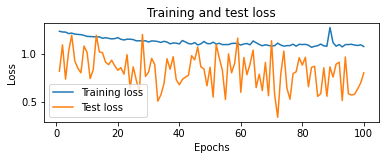

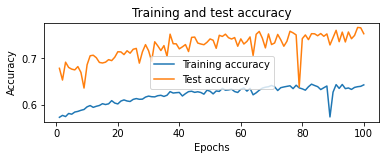

accuracy: 71.12%


In [33]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [34]:
model.save("Cifarmodel2.h5")

In [40]:
import keras
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen.fit(X_train)
val_datagen.fit(X_val)

training_set = train_datagen.flow(X_train, y_train, batch_size=32)
val_set = val_datagen.flow(X_train, y_train, batch_size=32)

X_test = X_test/255

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu' ))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu' ))
model.add(Conv2D(128, (3,3), activation='relu' ))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=False)

Epoch 1/10
1171/1171 [==============================] - 245s 210ms/step - loss: 2.0589 - accuracy: 0.2149 - val_loss: 1.9118 - val_accuracy: 0.3091
Epoch 2/10
1171/1171 [==============================] - 246s 211ms/step - loss: 1.8506 - accuracy: 0.3016 - val_loss: 1.7400 - val_accuracy: 0.4026
Epoch 3/10
1171/1171 [==============================] - 247s 211ms/step - loss: 1.7255 - accuracy: 0.3563 - val_loss: 1.5957 - val_accuracy: 0.3987
Epoch 4/10
1171/1171 [==============================] - 249s 213ms/step - loss: 1.6348 - accuracy: 0.3975 - val_loss: 0.8399 - val_accuracy: 0.4105
Epoch 5/10
1171/1171 [==============================] - 246s 210ms/step - loss: 1.5680 - accuracy: 0.4239 - val_loss: 1.1275 - val_accuracy: 0.4653
Epoch 6/10
1171/1171 [==============================] - 246s 210ms/step - loss: 1.5106 - accuracy: 0.4480 - val_loss: 0.7702 - val_accuracy: 0.5247
Epoch 7/10
1171/1171 [==============================] - 248s 212ms/step - loss: 1.4713 - accuracy: 0.4659 - val_

In [41]:
model.save("Cifarmodel3.h5")

In [42]:
model = load_model('Cifarmodel3.h5')

In [43]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=False)

Epoch 1/10
1171/1171 [==============================] - 262s 224ms/step - loss: 1.3255 - accuracy: 0.5273 - val_loss: 1.3318 - val_accuracy: 0.5834
Epoch 2/10
1171/1171 [==============================] - 264s 225ms/step - loss: 1.2893 - accuracy: 0.5376 - val_loss: 1.6330 - val_accuracy: 0.5707
Epoch 3/10
1171/1171 [==============================] - 248s 212ms/step - loss: 1.2660 - accuracy: 0.5470 - val_loss: 1.1217 - val_accuracy: 0.5950
Epoch 4/10
1171/1171 [==============================] - 248s 212ms/step - loss: 1.2430 - accuracy: 0.5576 - val_loss: 1.0637 - val_accuracy: 0.5963
Epoch 5/10
1171/1171 [==============================] - 248s 212ms/step - loss: 1.2235 - accuracy: 0.5621 - val_loss: 1.2605 - val_accuracy: 0.5715
Epoch 6/10
1171/1171 [==============================] - 248s 212ms/step - loss: 1.1994 - accuracy: 0.5747 - val_loss: 0.8413 - val_accuracy: 0.6462
Epoch 7/10
1171/1171 [==============================] - 246s 210ms/step - loss: 1.1883 - accuracy: 0.5782 - val_

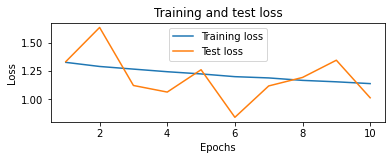

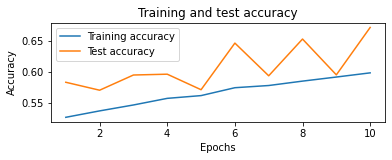

accuracy: 10.00%


In [44]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [45]:
model.save("Cifarmodel4.h5")

In [46]:
model = load_model('Cifarmodel4.h5')

In [47]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(training_set, 
                              validation_data=val_set,
                              validation_steps = len(X_val) // 32,
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                             shuffle=False)

Epoch 1/10
1171/1171 [==============================] - 295s 252ms/step - loss: 1.1278 - accuracy: 0.5994 - val_loss: 0.9321 - val_accuracy: 0.6554
Epoch 2/10
1171/1171 [==============================] - 226s 193ms/step - loss: 1.1080 - accuracy: 0.6099 - val_loss: 0.7769 - val_accuracy: 0.6514
Epoch 3/10
1171/1171 [==============================] - 225s 192ms/step - loss: 1.1003 - accuracy: 0.6124 - val_loss: 0.7214 - val_accuracy: 0.7000
Epoch 4/10
1171/1171 [==============================] - 222s 189ms/step - loss: 1.0844 - accuracy: 0.6192 - val_loss: 1.0097 - val_accuracy: 0.6965
Epoch 5/10
1171/1171 [==============================] - 224s 191ms/step - loss: 1.0734 - accuracy: 0.6244 - val_loss: 0.9608 - val_accuracy: 0.6797
Epoch 6/10
1171/1171 [==============================] - 226s 193ms/step - loss: 1.0656 - accuracy: 0.6254 - val_loss: 0.5868 - val_accuracy: 0.7052
Epoch 7/10
1171/1171 [==============================] - 224s 191ms/step - loss: 1.0566 - accuracy: 0.6302 - val_

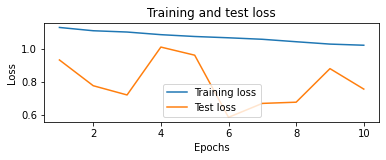

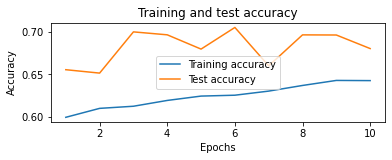

accuracy: 10.00%


In [48]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))